In [1]:
import pandas as pd


# In[83]:
df = pd.read_csv('Data_Train.csv')
df.head(10)
print(df.shape)


(78458, 11)


In [2]:

#Replace K, M, B
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    if ',' in x:
        return float(x.replace(',', '')) 
    return float(x)

df.Likes = df.Likes.apply(value_to_float)
df.Popularity = df.Popularity.apply(value_to_float)
df.to_csv('Data_Train_Transformed_1.csv')
df = df[df['Views'] > df["Likes"]]
# print(df.shape)
# print(df.head())

In [3]:
df.isnull().sum()

Unique_ID     0
Name          0
Genre         0
Country       0
Song_Name     1
Timestamp     0
Views         0
Comments      0
Likes         0
Popularity    0
Followers     0
dtype: int64

In [4]:
# Distribution of features by Genre
df_mean = df.groupby('Genre').mean()
#df_mean

In [5]:
#Histogram Plotting each variable
#Plotting Likes or comments or popularity
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(df['Likes'])
plt.ylabel('No of times')
plt.show()

#Plotting Comments
plt.hist(df['Comments'])
plt.ylabel('No of times')
plt.show()

#Plotting Popularity
plt.hist(df['Popularity'])
plt.ylabel('No of times')
plt.show()

#Plotting Views
plt.hist(df['Views'])
plt.ylabel('No of times')
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

Text(0,0.5,'Likes')

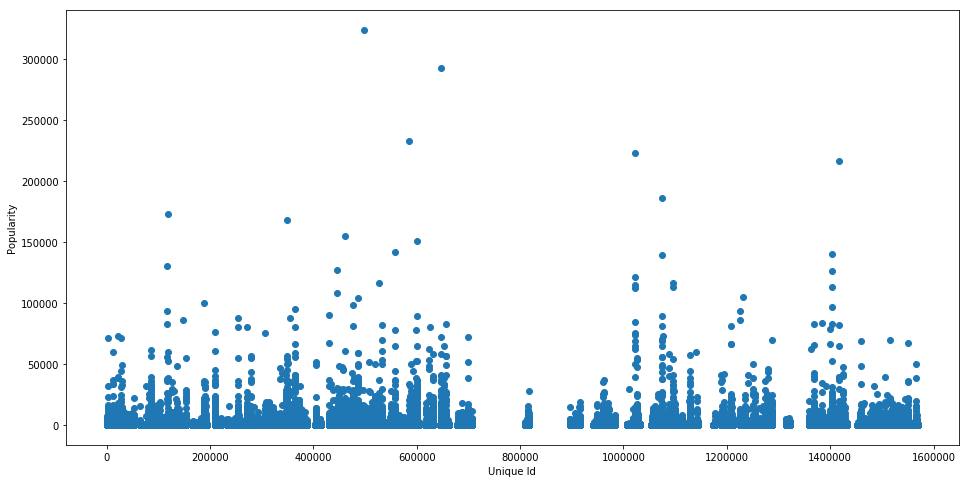

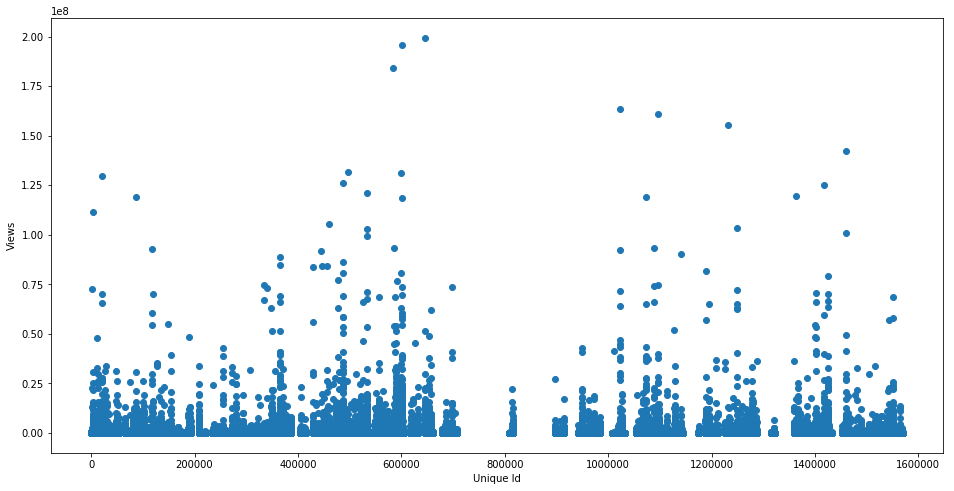

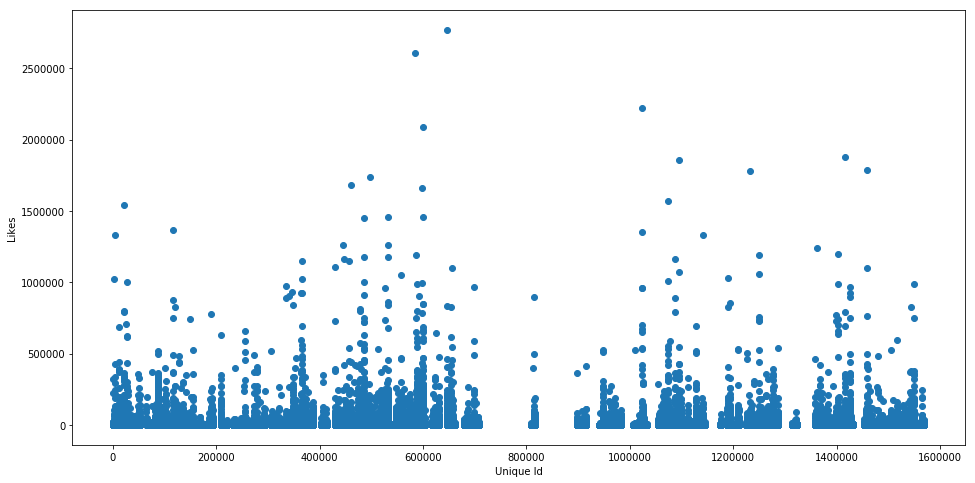

In [6]:
# Scatter Plot
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Unique_ID'], df['Popularity'])
ax.set_xlabel('Unique Id')
ax.set_ylabel('Popularity')

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Unique_ID'], df['Views'])
ax.set_xlabel('Unique Id')
ax.set_ylabel('Views')

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Unique_ID'], df['Likes'])
ax.set_xlabel('Unique Id')
ax.set_ylabel('Likes')

In [7]:
from scipy import stats
import numpy as np
df['like_z_score'] = np.abs(stats.zscore(df['Likes']))
df= df[df['like_z_score']<2]
df['pop_z_score'] = np.abs(stats.zscore(df['Popularity']))
df= df[df['pop_z_score']<2]
df['comment_z_score'] = np.abs(stats.zscore(df['Comments']))
df= df[df['comment_z_score']<2]
df['views_z_score'] = np.abs(stats.zscore(df['Views']))
df= df[df['views_z_score']<2]
df.drop(['like_z_score','pop_z_score','comment_z_score','views_z_score'],inplace = True, axis = 1)
df.shape

(70270, 11)

In [8]:
#Correlation matrix
print(df.head())
df.drop(['Unique_ID','Country','Timestamp','Song_Name','Comments','Followers'],inplace = True, axis = 1)
df.head()


   Unique_ID              Name     Genre Country  \
0     413890         Hardstyle  danceedm      AU   
1     249453        Dj Aladdin  danceedm      AU   
2     681116  Maxximize On Air  danceedm      AU   
3     387253       GR6 EXPLODE    rbsoul      AU   
4    1428029          Tritonal  danceedm      AU   

                                           Song_Name  \
0  N-Vitral presents BOMBSQUAD - Poison Spitter (...   
1          Dj Aladdin - Old School Hip Hop Quick Mix   
2  Maxximize On Air - Mixed by Blasterjaxx - Epis...   
3                MC Yago - Tenho Compromisso (DJ R7)   
4                         Escape (feat. Steph Jones)   

                    Timestamp   Views  Comments   Likes  Popularity  Followers  
0  2018-03-30 15:24:45.000000   14017         4   499.0        97.0     119563  
1  2016-06-20 05:58:52.000000    1918        17    49.0        17.0       2141  
2  2015-05-08 17:45:59.000000    9668        11   312.0        91.0      22248  
3  2017-06-08 23:50:03.000

,Name,Genre,Views,Likes,Popularity
0,Hardstyle,danceedm,14017,499.0,97.0
1,Dj Aladdin,danceedm,1918,49.0,17.0
2,Maxximize On Air,danceedm,9668,312.0,91.0
3,GR6 EXPLODE,rbsoul,113036,2400.0,76.0
4,Tritonal,danceedm,110024,3031.0,699.0


In [9]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# Converting Genre and Name to labelencoding
labelencoder = LabelEncoder()
df['Genre'] = labelencoder.fit_transform(df['Genre'])
df['Name'] = labelencoder.fit_transform(df['Name'])
df.head()


,Name,Genre,Views,Likes,Popularity
0,392,5,14017,499.0,97.0
1,262,5,1918,49.0,17.0
2,622,5,9668,312.0,91.0
3,356,17,113036,2400.0,76.0
4,957,5,110024,3031.0,699.0


In [10]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
features = [x for x in df.columns if x not in ['Views']]
df_scaled = sc_x.fit_transform(df[features])
df_scaled = pd.DataFrame(df_scaled)
print(df_scaled.head())

          0         1         2         3
0 -0.632513 -0.687215 -0.415210 -0.335856
1 -1.030070 -0.687215 -0.551952 -0.491887
2  0.070857 -0.687215 -0.472034 -0.347559
3 -0.742606  1.360400  0.162449 -0.376814
4  1.095331 -0.687215  0.354191  0.838271


D:\Applns\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Applns\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [11]:
df_scaled.isnull().sum()


0    0
1    0
2    0
3    0
dtype: int64

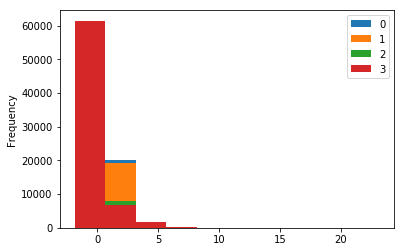

In [12]:
df_scaled.describe()
df_scaled.plot.hist()

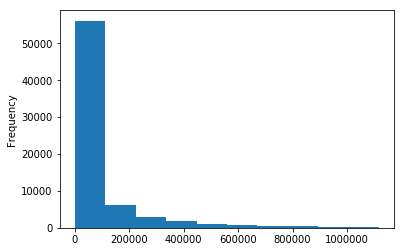

In [13]:
y = df['Views']
y.plot.hist()

In [14]:
from sklearn.model_selection import train_test_split
#print(df_scaled)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=.2, random_state=205)

In [15]:
#XGB Boost regression
import xgboost as xgb
from sklearn import metrics
xlf = xgb.XGBRegressor()
xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)])
# calculate the auc score
y_pred = xlf.predict(X_test)
#RMSE - Test
print("XGBoost - Linear regression: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


[13:23:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:170822
[1]	validation_0-rmse:156639
[2]	validation_0-rmse:144127
[3]	validation_0-rmse:133127
[4]	validation_0-rmse:123414
[5]	validation_0-rmse:114858
[6]	validation_0-rmse:107487
[7]	validation_0-rmse:101078
[8]	validation_0-rmse:95417


D:\Applns\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[9]	validation_0-rmse:90582.4
[10]	validation_0-rmse:86499
[11]	validation_0-rmse:82926.1
[12]	validation_0-rmse:79893
[13]	validation_0-rmse:77416.3
[14]	validation_0-rmse:75270.9
[15]	validation_0-rmse:73400.4
[16]	validation_0-rmse:71882.3
[17]	validation_0-rmse:70661.7
[18]	validation_0-rmse:69624.7
[19]	validation_0-rmse:68684.4
[20]	validation_0-rmse:67944.9
[21]	validation_0-rmse:67258.1
[22]	validation_0-rmse:66716.3
[23]	validation_0-rmse:66277.8
[24]	validation_0-rmse:65838.5
[25]	validation_0-rmse:65534.7
[26]	validation_0-rmse:65181.1
[27]	validation_0-rmse:64904.8
[28]	validation_0-rmse:64693.2
[29]	validation_0-rmse:64422.1
[30]	validation_0-rmse:64287.1
[31]	validation_0-rmse:64116
[32]	validation_0-rmse:63997.6
[33]	validation_0-rmse:63818.4
[34]	validation_0-rmse:63720.2
[35]	validation_0-rmse:63635.7
[36]	validation_0-rmse:63586.8
[37]	validation_0-rmse:63474.8
[38]	validation_0-rmse:63421.5
[39]	validation_0-rmse:63358.7
[40]	validation_0-rmse:63292.7
[41]	validation

In [16]:
#Implementing Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
print("RMSE - Linear regression: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


RMSE - Linear regression:  68082.23341709065
